# Greece

In [1]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

pd.options.mode.chained_assignment = None
%config InlineBackend.figure_format = 'retina'

## Fetch results

In [29]:
def get_turnout(id):
    url = f'http://ekloges-prev.singularlogic.eu/may2014/dyn/e/dhm_{id}.js'
    r = requests.get(url)
    d = r.json()
    return (d['Egkyra'] + d['Akyra'] + d['Leyka']) / d['Gramenoi']

In [24]:
# Go to the website and run `copy(JSON.stringify(static.dhm))`
# in the console to get all the metadata, then paste below

meta = [[9186,"Αθηναίων",1112,38],[9179,"Αγίας Βαρβάρας",51,39],[9167,"Αγίας Παρασκευής",86,39],[9194,"Αγίου Δημητρίου",98,39],[9180,"Αγιων Αναργύρων - Καματερού",97,39],[9181,"Αιγάλεω",134,39],[9195,"Αλίμου",70,39],[9168,"Αμαρουσίου",110,39],[9169,"Βριλησσίων",45,39],[9187,"Βύρωνος",100,39],[9188,"Γαλατσίου",86,39],[9196,"Γλυφάδας",136,39],[9189,"Δάφνης - Υμηττού",69,39],[9197,"Ελληνικού - Αργυρούπολης",84,39],[9190,"Ζωγράφου",112,39],[9191,"Ηλιουπόλεως",133,39],[9170,"Ηρακλείου",78,39],[9182,"Ιλίου",119,39],[9192,"Καισαριανής",54,39],[9198,"Καλλιθέας",176,39],[9171,"Κηφισιάς",119,39],[9172,"Λυκόβρυσης - Πεύκης",49,39],[9173,"Μεταμορφώσεως",44,39],[9199,"Μοσχάτου - Ταύρου",83,39],[9174,"Νέας Ιωνίας",111,39],[9200,"Νέας Σμύρνης",124,39],[9201,"Παλαιού Φαλήρου",111,39],[9175,"Παπάγου - Χολαργού",83,39],[9176,"Πεντέλης",55,39],[9183,"Περιστερίου",250,39],[9184,"Πετρουπόλεως",86,39],[9193,"Φιλαδέλφειας - Χαλκηδόνος",71,39],[9177,"Φιλοθέης - Ψυχικού",62,39],[9178,"Χαλανδρίου",116,39],[9185,"Χαϊδαρίου",74,39],[9208,"Αίγινας",29,40],[9207,"Αγκιστρίου",2,40],[9209,"Κυθήρων",20,40],[9205,"Πειραιώς",356,40],[9210,"Πόρου",10,40],[9212,"Σπετσών",10,40],[9213,"Τροιζηνίας",23,40],[9214,"Υδρας",7,40],[9202,"Κερατσινίου - Δραπετσώνας",166,41],[9203,"Κορυδαλλού",113,41],[9204,"Νίκαιας - Αγίου Ιωάννη Ρέντη",212,41],[9206,"Περάματος",52,41],[9211,"Σαλαμίνας",70,41],[9228,"Ασπροπύργου",54,42],[9215,"Αχαρνών",149,42],[9216,"Βάρης - Βούλας - Βουλιαγμένης",83,42],[9217,"Διονύσου",58,42],[9229,"Ελευσίνας",53,42],[9218,"Κρωπίας",43,42],[9219,"Λαυρεωτικής",44,42],[9230,"Μάνδρας - Ειδυλλίας",39,42],[9220,"Μαραθώνος",52,42],[9221,"Μαρκοπούλου Μεσογαίας",31,42],[9231,"Μεγαρέων",62,42],[9222,"Παιανίας",39,42],[9223,"Παλλήνης",68,42],[9224,"Ραφήνας - Πικερμίου",29,42],[9225,"Σαρωνικού",52,42],[9226,"Σπάτων - Αρτέμιδος",51,42],[9232,"Φυλής",73,42],[9227,"Ωρωπού",52,42],[9123,"Αγρινίου",207,30],[9124,"Ακτιου - Βόνιτσας",44,30],[9125,"Αμφιλοχίας",65,30],[9126,"Θέρμου",33,30],[9127,"Ιεράς Πόλης Μεσολογγίου",78,30],[9128,"Ναυπακτίας",102,30],[9129,"Ξηρομέρου",41,30],[9233,"Αργους - Μυκηνών",102,44],[9234,"Επιδαύρου",20,44],[9235,"Ερμιονίδας",27,44],[9236,"Ναυπλιέων",65,44],[9237,"Βόρειας Κυνουρίας",38,45],[9238,"Γορτυνίας",84,45],[9239,"Μεγαλόπολης",70,45],[9240,"Νότιας Κυνουρίας",25,45],[9241,"Τρίπολης",141,45],[9073,"Αρταίων",93,19],[9074,"Γεωργίου Καραϊσκάκη",31,19],[9075,"Κεντρικών Τζουμέρκων ",38,19],[9076,"Νικολάου Σκουφά",37,19],[9130,"Αιγιαλείας",137,31],[9131,"Δυτικής Αχαϊας",67,31],[9132,"Ερυμάνθου",43,31],[9133,"Καλαβρύτων",78,31],[9134,"Πατρέων",325,31],[9142,"Αλιάρτου - Θεσπιέων ",24,36],[9143,"Διστόμου - Αράχοβας - Αντίκυρας",16,36],[9144,"Θηβαίων",70,36],[9145,"Λεβαδέων",67,36],[9146,"Ορχομενού",28,36],[9147,"Τανάγρας",32,36],[9061,"Γρεβενών",102,17],[9062,"Δεσκάτης",23,17],[9001,"Δοξάτου",42,4],[9002,"Δράμας",104,4],[9003,"Κάτω Νευροκοπίου",30,4],[9004,"Παρανεστίου",21,4],[9005,"Προσοτσάνης",52,4],[9274,"Αγαθονησίου",1,52],[9275,"Αστυπάλαιας",4,52],[9281,"Κάσου",4,52],[9276,"Καλυμνίων",43,52],[9280,"Καρπάθου",17,52],[9284,"Κω",57,52],[9278,"Λέρου",17,52],[9277,"Λειψών",2,52],[9295,"Μεγίστης",1,52],[9285,"Νισύρου",4,52],[9279,"Πάτμου",8,52],[9296,"Ρόδου",204,52],[9297,"Σύμης",9,52],[9298,"Τήλου",2,52],[9299,"Χάλκης",2,52],[9006,"Αλεξανδρούπολης",123,1],[9007,"Διδυμοτείχου",72,1],[9008,"Ορεστιάδας",104,1],[9009,"Σαμοθράκης",9,1],[9010,"Σουφλίου",52,1],[9148,"Διρφύων - Μεσσαπίων",53,37],[9149,"Ερέτριας",27,37],[9150,"Ιστιαίας - Αιδηψού",59,37],[9151,"Καρύστου",41,37],[9152,"Κύμης - Αλιβερίου",89,37],[9153,"Μαντουδίου - Λίμνης - Αγίας Αννας",40,37],[9154,"Σκύρου",8,37],[9155,"Χαλκιδέων",149,37],[9156,"Αγράφων",51,34],[9157,"Καρπενησίου",72,34],[9116,"Ζακύνθου",99,29],[9136,"Ανδρίτσαινας - Κρεστένων",49,32],[9135,"Ανδραβίδας - Κυλλήνης",53,32],[9137,"Αρχαίας Ολυμπίας",53,32],[9138,"Ζαχάρως",38,32],[9139,"Ηλιδας",77,32],[9140,"Πηνειού",37,32],[9141,"Πύργου",118,32],[9023,"Αλεξάνδρειας",94,12],[9024,"Βέροιας",128,12],[9025,"Νάουσας",70,12],[9302,"Αρχανών - Αστερουσίων",45,55],[9303,"Βιάννου",20,55],[9304,"Γόρτυνας",52,55],[9305,"Ηρακλείου",264,55],[9306,"Μαλεβιζίου",49,55],[9307,"Μινώα Πεδιάδος",49,55],[9308,"Φαιστού",52,55],[9309,"Χερσονήσου",44,55],[9077,"Ηγουμενίτσας",61,20],[9078,"Σουλίου",46,20],[9079,"Φιλιατών",56,20],[9026,"Αμπελοκήπων - Μενεμένης",73,6],[9031,"Θεσσαλονίκης",487,6],[9032,"Καλαμαριάς",105,6],[9033,"Κορδελιού -Ευόσμου",108,6],[9035,"Νεάπολης - Συκεών",129,6],[9036,"Παύλου Μελά",112,6],[9027,"Βόλβης",57,7],[9028,"Δέλτα",74,7],[9030,"Θέρμης",70,7],[9029,"Θερμαϊκού",64,7],[9034,"Λαγκαδά",113,7],[9037,"Πυλαίας - Χορτιάτη",80,7],[9038,"Χαλκηδόνος",68,7],[9039,"Ωραιοκάστρου",60,7],[9080,"Βορείων Τζουμέρκων",33,18],[9081,"Δωδώνης",61,18],[9083,"Ζίτσας",67,18],[9082,"Ζαγορίου",44,18],[9084,"Ιωαννιτών",139,18],[9085,"Κόνιτσας",45,18],[9086,"Μετσόβου",22,18],[9087,"Πωγωνίου",61,18],[9011,"Θάσου",31,5],[9012,"Καβάλας",137,5],[9013,"Νέστου",63,5],[9014,"Παγγαίου",80,5],[9091,"Αργιθέας",26,25],[9092,"Καρδίτσας",111,25],[9093,"Λίμνης Πλαστήρα",22,25],[9094,"Μουζακίου",54,25],[9095,"Παλαμά",47,25],[9096,"Σοφάδων",56,25],[9063,"Καστοριάς",92,16],[9064,"Νεστορίου",22,16],[9065,"Ορεστίδος",34,16],[9118,"Κέρκυρας",237,26],[9119,"Παξών",6,26],[9117,"Ιθάκης",11,28],[9120,"Κεφαλονιάς",111,28],[9040,"Κιλκίς",153,10],[9041,"Παιονίας",86,10],[9066,"Βοϊου",91,15],[9067,"Εορδαίας",100,15],[9068,"Κοζάνης",150,15],[9069,"Σερβίων - Βελβεντού ",58,15],[9242,"Βέλου - Βόχας",39,43],[9243,"Κορινθίων",107,43],[9244,"Λουτρακίου - Αγίων Θεοδώρων",38,43],[9245,"Νεμέας",19,43],[9246,"Ξυλοκάστρου - Ευρωστίνης",56,43],[9247,"Σικυωνίων",60,43],[9291,"Αμοργού",7,51],[9269,"Ανάφης",1,51],[9268,"Ανδρου",36,51],[9293,"Αντιπάρου",2,51],[9270,"Θήρας",29,51],[9271,"Ιητών",5,51],[9282,"Κέας",5,51],[9286,"Κιμώλου",3,51],[9283,"Κύθνου",5,51],[9287,"Μήλου",11,51],[9290,"Μυκόνου",15,51],[9292,"Νάξου & Μικρών Κυκλάδων",53,51],[9294,"Πάρου",25,51],[9289,"Σίφνου",7,51],[9288,"Σερίφου",5,51],[9272,"Σικίνου",1,51],[9300,"Σύρου - Ερμούπολης",42,51],[9301,"Τήνου",25,51],[9273,"Φολεγάνδρου",2,51],[9248,"Ανατολικής Μάνης",69,47],[9249,"Ελαφονήσου",3,47],[9250,"Ευρώτα",52,47],[9251,"Μονεμβασίας",66,47],[9252,"Σπάρτης",119,47],[9097,"Αγιάς",34,22],[9098,"Ελασσόνας",89,22],[9099,"Κιλελέρ",63,22],[9100,"Λαρισαίων",217,22],[9101,"Τεμπών ",44,22],[9102,"Τυρνάβου",47,22],[9103,"Φαρσάλων",49,22],[9310,"Αγίου Νικολάου",55,56],[9311,"Ιεράπετρας",55,56],[9312,"Οροπεδίου Λασιθίου",13,56],[9313,"Σητείας",51,56],[9262,"Αγίου Ευστρατίου",2,48],[9261,"Λέσβου",198,48],[9263,"Λήμνου",56,48],[9121,"Λευκάδας",71,27],[9122,"Μεγανησίου",5,27],[9104,"Αλμυρού",54,23],[9109,"Αλοννήσου",4,23],[9105,"Βόλου",247,23],[9106,"Ζαγοράς - Μουρεσίου",20,23],[9107,"Νοτίου Πηλίου",34,23],[9108,"Ρήγα Φεραίου",33,23],[9110,"Σκιάθου",11,23],[9111,"Σκοπέλου",13,23],[9253,"Δυτικής Μάνης",29,46],[9254,"Καλαμάτας",141,46],[9255,"Μεσσήνης",102,46],[9256,"Οιχαλίας",67,46],[9257,"Πύλου - Νέστορος",81,46],[9258,"Τριφυλλίας",96,46],[9015,"Αβδήρων",55,3],[9016,"Μύκης",41,3],[9017,"Ξάνθης",95,3],[9018,"Τοπείρου",33,3],[9042,"Αλμωπίας",74,11],[9043,"Εδεσσας",66,11],[9044,"Πέλλας",138,11],[9045,"Σκύδρας",45,11],[9046,"Δίου - Ολύμπου",54,13],[9047,"Κατερίνης",175,13],[9048,"Πύδνας - Κολινδρού",45,13],[9088,"Ζηρού",47,21],[9089,"Πάργας",43,21],[9090,"Πρέβεζας",71,21],[9314,"Αγίου Βασιλείου",32,54],[9315,"Αμαρίου",26,54],[9316,"Ανωγείων",5,54],[9317,"Μυλοποτάμου",46,54],[9318,"Ρεθύμνης",95,54],[9019,"Αρριανών",55,2],[9020,"Ιάσμου",42,2],[9021,"Κομοτηνής",117,2],[9022,"Μαρωνείας - Σαπών",52,2],[9259,"Ικαρίας ",27,50],[9264,"Σάμου",90,50],[9260,"Φούρνων Κορσεών",5,50],[9049,"Αμφίπολης",34,8],[9050,"Βισαλτίας",69,8],[9051,"Εμμανουήλ Παππά",51,8],[9052,"Ηρακλείας",66,8],[9053,"Νέας Ζίχνης",39,8],[9054,"Σερρών",153,8],[9055,"Σιντικής",91,8],[9112,"Καλαμπάκας",96,24],[9113,"Πύλης",71,24],[9114,"Τρικκαίων",146,24],[9115,"Φαρκαδόνας",43,24],[9158,"Αμφίκλειας - Ελάτειας",28,33],[9159,"Δομοκού",40,33],[9160,"Λαμιέων",139,33],[9161,"Λοκρών",43,33],[9162,"Μακρακώμης",58,33],[9163,"Μώλου - Αγίου Κωνσταντίνου",30,33],[9164,"Στυλίδας",31,33],[9070,"Αμυνταίου",49,14],[9071,"Πρεσπών",18,14],[9072,"Φλώρινας",108,14],[9165,"Δελφών",69,35],[9166,"Δωρίδος",66,35],[9056,"Αριστοτέλη",45,9],[9057,"Κασσάνδρας",32,9],[9058,"Νέας Προποντίδας",68,9],[9059,"Πολυγύρου",49,9],[9060,"Σιθωνίας",26,9],[9319,"Αποκορώνου",47,53],[9320,"Γαύδου",1,53],[9321,"Καντάνου - Σελίνου",19,53],[9322,"Κισσάμου",38,53],[9323,"Πλατανιά",62,53],[9324,"Σφακίων",11,53],[9325,"Χανίων",160,53],[9265,"Οινουσσών",3,49],[9266,"Χίου",145,49],[9267,"Ψαρών",2,49]]

In [33]:
turnouts = []
for m in meta:
    turnouts.append(get_turnout(m[0]))

In [37]:
df = pd.DataFrame(meta)
df['turnout'] = turnouts

In [39]:
df.columns = ['id', 'name', 'id2', 'id3', 'turnout']

In [226]:
# Fix inconsistencies
df.name = df.name.replace('Βοϊου', 'Βοΐου')
df.name = df.name.replace('Αγιων Αναργύρων - Καματερού', 'Αγίων Αναργύρων - Καματερού')
df.name = df.name.replace('Φιλαδέλφειας - Χαλκηδόνος', 'Φιλαδελφείας - Χαλκηδόνος')
df.name = df.name.replace('Ικαρίας', 'Ικαριάς')
df.name = df.name.replace('Ανδρου', 'Άνδρου')
df.name = df.name.replace('Αστυπάλαιας', 'Αστυπαλαίας')
df.name = df.name.replace('Νάξου & Μικρών Κυκλάδων', 'Νάξου και Μικρών Κυκλάδων')
df.name = df.name.replace('Μεγίστης', 'Μεγίστη')
df.name = df.name.replace('Σαλαμίνας', 'Σαλαμίνος')
df.name = df.name.replace('Τροιζηνίας', 'Τροιζηνία-Μέθανα')
df.name = df.name.replace('Μινώα Πεδιάδος', 'Μινώα Πεδιάδας')
df.name = df.name.replace('Υδρας', 'Ύδρας')
df.name = df.name.replace('Εδεσσας', 'Έδεσσας')
df.name = df.name.replace('Ρεθύμνης', 'Ρεθύμνου')
df.name = df.name.replace('Μονεμβασίας', 'Μονεμβασιάς')
df.name = df.name.replace('Στυλίδας', 'Στυλίδος')
df.name = df.name.replace('Ηλιδας', 'Ηλίδας')
df.name = df.name.replace('Αμαρίου', 'Αμάριου')
df.name = df.name.replace('Δυτικής Αχαϊας', 'Δυτικής Αχαΐας')
df.name = df.name.replace('Διστόμου - Αράχοβας - Αντίκυρας', 'Διστόμου - Αράχοβας - Αντικύρας')
df.name = df.name.replace('Βέλου - Βόχας', 'Βέλου - Βοχας')
df.name = df.name.replace('Ακτιου - Βόνιτσας', 'Άκτιου - Βόνιτσας')
df.name = df.name.replace('Ανδρίτσαινας - Κρεστένων', 'Ανδριτσαίνας - Κρεστένων')
df.name = df.name.replace('Αργους - Μυκηνών', 'Άργους - Μυκηνών')
df.name = df.name.replace('Κορδελιού -Ευόσμου', 'Κορδελιού - Ευόσμου')
df.name = df.name.replace('Μαρωνείας - Σαπών', 'Μαρώνειας - Σαπών')
df.name = df.name.replace('Μαντουδίου - Λίμνης - Αγίας Αννας', 'Μαντουδίου - Λίμνης')
df.name = df.name.replace('Αλιάρτου - Θεσπιέων', 'Αλιάρτου')
df.name = df.name.replace('Πέλλας', 'Αρχαίας Πέλλας')
df.name = df.name.replace('Ανδραβίδας - Κυλλήνης', 'Κυλλήνης')
df.name = df.name.replace('Νέας Προποντίδας', 'Καλλικράτειας - Μουδανιών')

In [156]:
df.name = df.name.str.strip()

In [7]:
df.turnout = df.turnout * 100

In [22]:
df.to_csv('../../data/raw/grc.csv', index=False)

In [2]:
df = pd.read_csv('../../data/raw/grc.csv')

## Merge

In [11]:
geo = gpd.read_file('../../data/shapefiles/grc/gadm36_GRC_3.shp')

In [12]:
geo = geo.merge(df, left_on='NL_NAME_3', right_on='name', how='left')

## Export

In [6]:
geo = geo[['name', 'turnout', 'geometry']]
geo['country'] = 'grc'

In [21]:
geo.to_file('../../data/processed/grc')

## Visualize

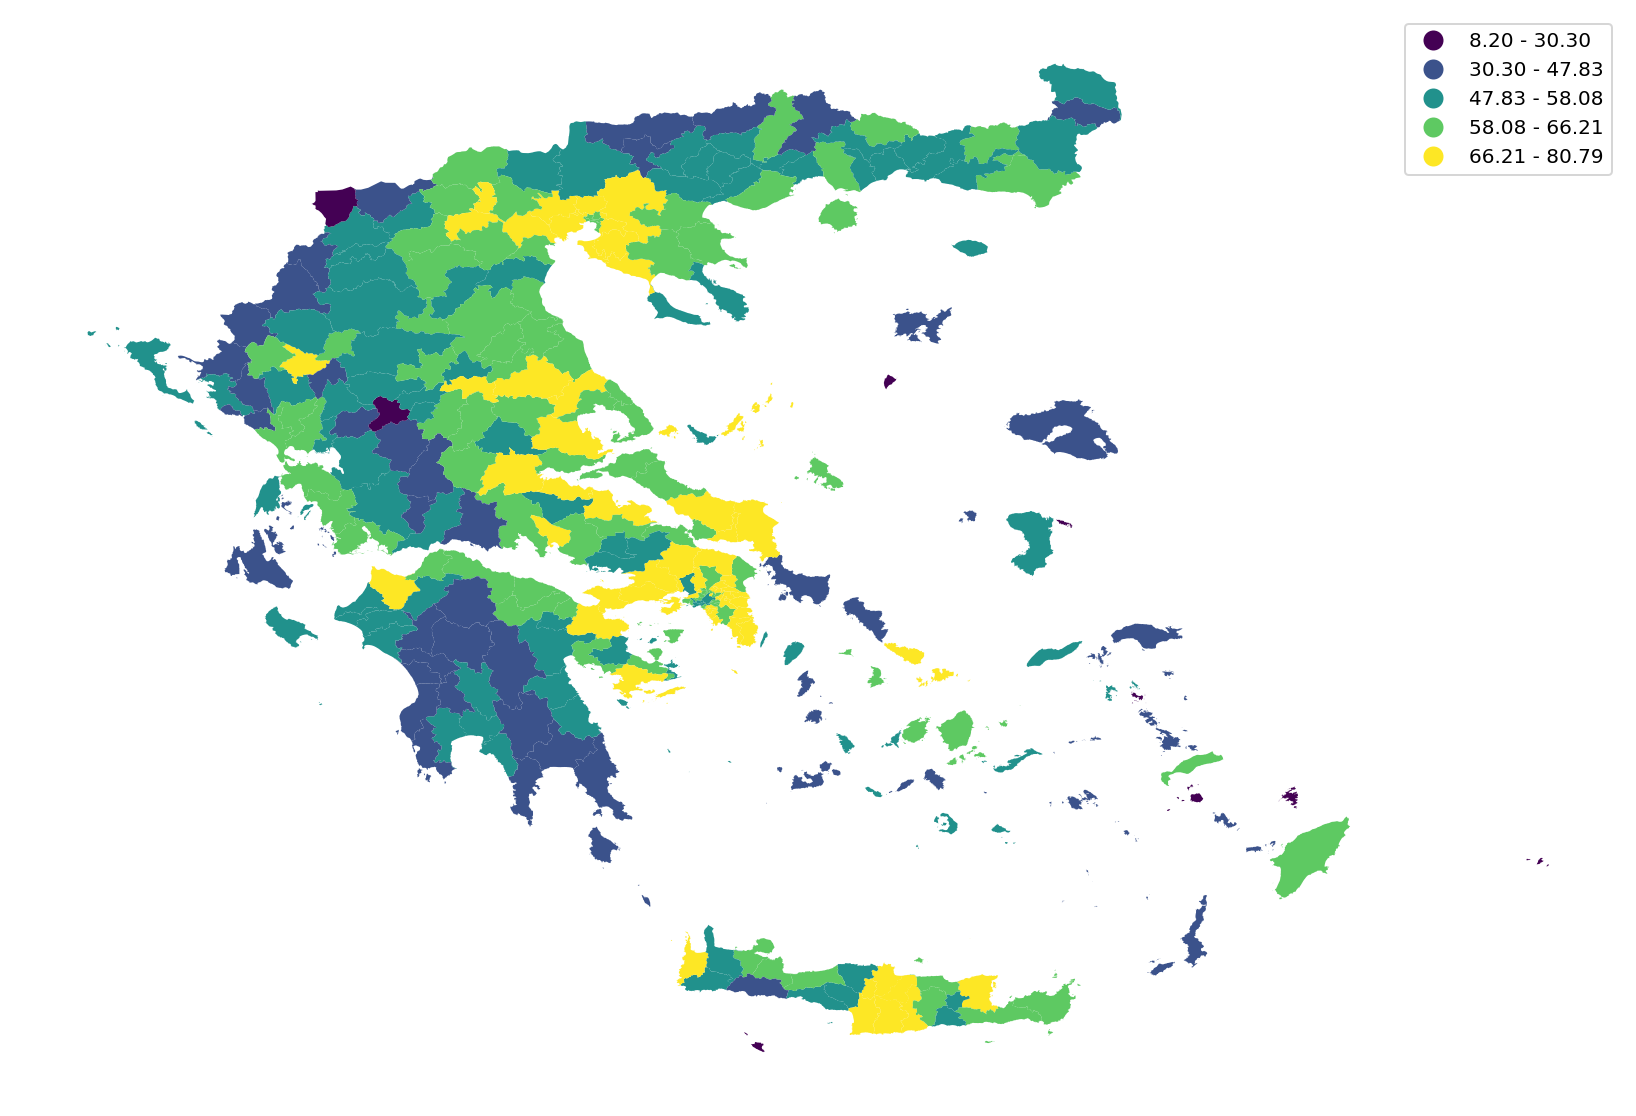

In [16]:
ax = geo.dropna(subset=['turnout']).plot(figsize=(20, 10), column='turnout', legend=True, scheme='Fisher_Jenks');
fig = ax.get_figure()
fig.set_facecolor('#ffffff')
ax.set_axis_off()
fig.savefig('../../reports/grc_choropleth.png')